# Python API Homework 

Observations:

•	There are three climate zones.  When I overlapped them on my charts it helped to visualize the patterns.  The Tropical Zone is 23.5 to -23.5, the Temperate Zone is 23.5 to 66.5 and -23.5 to -66.5, and finally the Polar Zone is 66.5 to 90 and -66.5 to -90.  Temperature is a perfect curve along the line with the highest temperatures along the equator and falling as you head North or South.  So the closer to the equator you are, the warmer the temperature.

•	There is no clustering or pattern of wind speed around the equator.  The data seems to prove out the Coriolis Effect, such that the latitude will impact the direction of the wind, but not the speed of the wind.

•	Cloud cover is strictly an observed event.  The graph is patterned heavily along specific percentages assigned by an observer.  This chart shows that while the latitude does not impact level of cloudiness, the observers bias toward percentages is very strong.


In [1]:
# Dependencies
import random
import json
import requests as req
from citipy import citipy
from key_vault import ow_api_key
import pandas as pd
from random import uniform
import matplotlib.pyplot as plt
import csv
from time import strftime, localtime

In [2]:
# set parameters and build partial url for api requests
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = url + ow_api_key + "&units=" + units + "&q="

In [3]:
#This section of code sets up the dataframe by randomly selecting lat/lon finding the nearest city and dropping duplicates

city_num = 1500

data_df= {}
data_df=pd.DataFrame(data_df)
data_df["City"]= ' '
data_df["Country"]= ' '
data_df["lat"]= ' '
data_df["lon"]= ' '
data_df["Temp"]= ' '
data_df["Temp_Min"]= ' '
data_df["Temp_Max"]= ' '
data_df["Humidity"] = ' '
data_df["Cloud"] = ' '
data_df["Wind_Speed"]= ' '


for index in range(0, city_num):
    x, y = uniform(-180,180), uniform(-90, 90)
    data_df.set_value(index, "lat", y)
    data_df.set_value(index, "lon", x)
    data_df.set_value(index, "City", citipy.nearest_city(y,x).city_name)
    data_df.set_value(index, "Country", citipy.nearest_city(y,x).country_code)

data_df= data_df.drop_duplicates("City")    
data_df = data_df.reset_index(drop=True)
data_df.head(10)   

,City,Country,lat,lon,Temp,Temp_Min,Temp_Max,Humidity,Cloud,Wind_Speed
0,den helder,nl,54.487,3.75836,NaN,NaN,NaN,NaN,NaN,NaN
1,quatre cocos,mu,-15.9899,66.5284,NaN,NaN,NaN,NaN,NaN,NaN
2,bengkulu,id,-14.9051,95.2989,NaN,NaN,NaN,NaN,NaN,NaN
3,bambanglipuro,id,-11.6079,110.341,NaN,NaN,NaN,NaN,NaN,NaN
4,ushuaia,ar,-61.9434,-39.8308,NaN,NaN,NaN,NaN,NaN,NaN
5,rikitea,pf,-33.1008,-105.159,NaN,NaN,NaN,NaN,NaN,NaN
6,nagato,jp,36.1132,130.448,NaN,NaN,NaN,NaN,NaN,NaN
7,pisco,pe,-20.9697,-86.8391,NaN,NaN,NaN,NaN,NaN,NaN
8,kousseri,cm,12.2994,14.5333,NaN,NaN,NaN,NaN,NaN,NaN
9,tulnici,ro,46.0147,26.5481,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#This section of code executes the api requests from open weather. For all of the cities, it will replace the 
#estimated lat/lon with actual lat/lon and load the data into the dataframe.  lastly, it drops cities that are
#not in open weather.
print("API pull started at :" + strftime("%a, %d %b %Y %H:%M:%S ", localtime()))
weather_data = []
for index in range (0, len(data_df["City"])):
    weather_data= req.get(query_url + data_df.iloc[index,0] + ',' + data_df.iloc[index,1]).json()
    print("Now retrieving " + data_df.iloc[index,0] +", " + " city # " + str(index) )
    try:
        data_df.set_value(index, "lat",weather_data['coord']['lat'])
        data_df.set_value(index, "lon",weather_data['coord']['lon'])
        data_df.set_value(index, "Temp",weather_data['main']['temp'])
        data_df.set_value(index, "Humidity",weather_data['main']['humidity'])
        data_df.set_value(index, "Temp_Min",weather_data['main']['temp_min'])
        data_df.set_value(index, "Temp_Max",weather_data['main']['temp_max'])
        data_df.set_value(index, "Wind_Speed",weather_data['wind']['speed'])
        data_df.set_value(index, "Cloud", weather_data['clouds']['all'])
        
    except KeyError: continue
print("API pull ended at :" + strftime("%a, %d %b %Y %H:%M:%S ", localtime()))        

API pull started at :Thu, 16 Nov 2017 17:22:41 
Now retrieving den helder,  city # 0
Now retrieving quatre cocos,  city # 1
Now retrieving bengkulu,  city # 2
Now retrieving bambanglipuro,  city # 3
Now retrieving ushuaia,  city # 4
Now retrieving rikitea,  city # 5
Now retrieving nagato,  city # 6
Now retrieving pisco,  city # 7
Now retrieving kousseri,  city # 8
Now retrieving tulnici,  city # 9
Now retrieving barrow,  city # 10
Now retrieving luderitz,  city # 11
Now retrieving salalah,  city # 12
Now retrieving ondangwa,  city # 13
Now retrieving sumter,  city # 14
Now retrieving brisbane,  city # 15
Now retrieving oktyabrskoye,  city # 16
Now retrieving amderma,  city # 17
Now retrieving poum,  city # 18
Now retrieving north bend,  city # 19
Now retrieving longyearbyen,  city # 20
Now retrieving qaanaaq,  city # 21
Now retrieving plettenberg bay,  city # 22
Now retrieving baiao,  city # 23
Now retrieving saldanha,  city # 24
Now retrieving tocopilla,  city # 25
Now retrieving kend

Now retrieving chagda,  city # 222
Now retrieving makakilo city,  city # 223
Now retrieving uchiza,  city # 224
Now retrieving saskylakh,  city # 225
Now retrieving yellowknife,  city # 226
Now retrieving springbok,  city # 227
Now retrieving kibaya,  city # 228
Now retrieving ulladulla,  city # 229
Now retrieving pacific grove,  city # 230
Now retrieving kieta,  city # 231
Now retrieving yar-sale,  city # 232
Now retrieving san patricio,  city # 233
Now retrieving port blair,  city # 234
Now retrieving saryshagan,  city # 235
Now retrieving grindavik,  city # 236
Now retrieving bathsheba,  city # 237
Now retrieving macapa,  city # 238
Now retrieving machali,  city # 239
Now retrieving acapulco,  city # 240
Now retrieving yerbogachen,  city # 241
Now retrieving ginir,  city # 242
Now retrieving phonhong,  city # 243
Now retrieving simav,  city # 244
Now retrieving lufilufi,  city # 245
Now retrieving pevek,  city # 246
Now retrieving springfield,  city # 247
Now retrieving la tuque,  c

Now retrieving carutapera,  city # 443
Now retrieving banmo,  city # 444
Now retrieving devavanya,  city # 445
Now retrieving alofi,  city # 446
Now retrieving wum,  city # 447
Now retrieving tiruchchirappalli,  city # 448
Now retrieving darnah,  city # 449
Now retrieving labuhan,  city # 450
Now retrieving sapa,  city # 451
Now retrieving artyk,  city # 452
Now retrieving teknaf,  city # 453
Now retrieving ancud,  city # 454
Now retrieving alihe,  city # 455
Now retrieving kjollefjord,  city # 456
Now retrieving zhangye,  city # 457
Now retrieving sitka,  city # 458
Now retrieving sistranda,  city # 459
Now retrieving atambua,  city # 460
Now retrieving cape coast,  city # 461
Now retrieving cockburn town,  city # 462
Now retrieving esperance,  city # 463
Now retrieving hailey,  city # 464
Now retrieving baykalovo,  city # 465
Now retrieving staryy nadym,  city # 466
Now retrieving chimbote,  city # 467
Now retrieving coquimbo,  city # 468
Now retrieving capinzal,  city # 469
Now retr

In [5]:
#final data cleanup, dropping Cities not in the Weather database and resetting the index
data_df= data_df.dropna()
data_df = data_df.reset_index(drop=True)

In [6]:
#save the DataFrame to a csv file
data_df.to_csv("Global_Weather_Data.csv", encoding= 'utf-8', index = False)
data_df

,City,Country,lat,lon,Temp,Temp_Min,Temp_Max,Humidity,Cloud,Wind_Speed
0,fulton,us,38.85,-91.95,39.07,37.4,41,60,1,3.36
1,ushuaia,ar,-54.8,-68.3,46.4,46.4,46.4,65,40,5.82
2,albany,au,-35.02,117.89,68.69,68.69,68.69,79,48,12.66
3,ust-maya,ru,60.42,134.53,-24.15,-24.15,-24.15,35,44,2.71
4,saint-philippe,re,-21.36,55.77,75.09,73.4,77,78,40,3.36
5,barrow,us,71.29,-156.79,15.8,15.8,15.8,92,90,16.11
6,hobart,au,-42.88,147.33,55.4,55.4,55.4,93,75,5.82
7,grindavik,is,63.84,-22.43,34.65,33.8,35.6,59,75,14.99
8,rikitea,pf,-23.12,-134.97,75.53,75.53,75.53,100,20,7.52
9,hasaki,jp,35.73,140.83,40.75,37.4,44.6,70,75,11.41


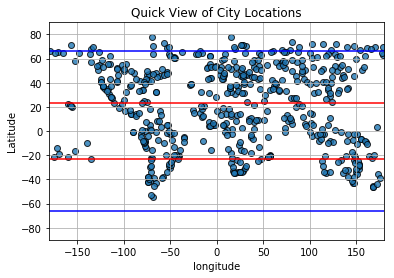

In [6]:
#scatter plot of the lat/lon in the dataframe to verify distribution, should resemble a map

plt.scatter(data_df["lon"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Quick View of City Locations")
plt.ylabel("Latitude")
plt.xlabel("longitude")
plt.grid(True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')

# Save the figure
plt.savefig("Ploting_graph_of_Cities.png")

# Show plot
plt.show()


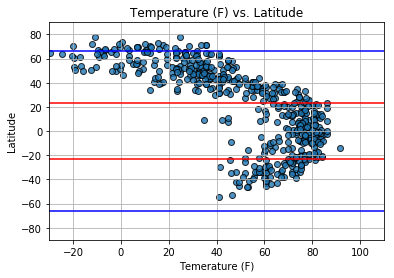

In [7]:
# Build a scatter plot for Temerature ranges along different Latitudes 
plt.scatter(data_df["Temp"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Latitude")

# Incorporate the other graph properties
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temerature (F)")
plt.grid(True)
plt.xlim([data_df['Temp'].min() - 5, data_df['Temp'].max() + 5])
plt.xlim([-30, 110])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')

# Save the figure
plt.savefig("Temp_Latitude.png")

# Show plot
plt.show()

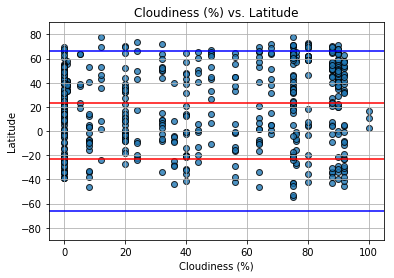

In [8]:
# Build a scatter plot for Cloud cover along different Latitudes 
plt.scatter(data_df["Cloud"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Latitude")

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-5, 105])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()


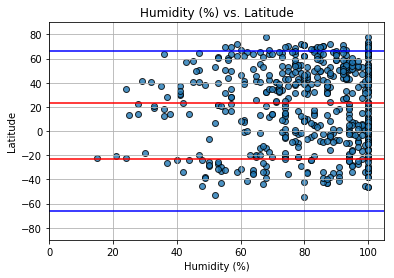

In [9]:
# Build a scatter plot for Humidity % along different Latitudes 
plt.scatter(data_df["Humidity"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Latitude")

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.xlim([0, 105])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')
# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()



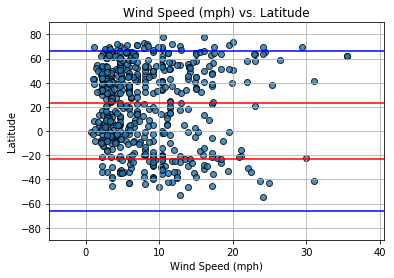

In [10]:
# Build a scatter plot for Wind Speeds along different Latitudes 
plt.scatter(data_df["Wind_Speed"], data_df["lat"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Latitude")

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-5, data_df['Wind_Speed'].max() + 5])
plt.ylim([-90, 90])
plt.axhline(y=23.5, c='r')
plt.axhline(y=-23.5, c='r')
plt.axhline(y=66.5, c='b')
plt.axhline(y=-66.5, c='b')
# Save the figure
plt.savefig("Wind_Speed_Latitude.png")

# Show plot
plt.show()
